<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-III/blob/main/Fourier_Trans_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fast Fourier Transform (FFT) : Discrete Fourier Transform (DFT)**

- Computation of Discrete Fourier Transform (DFT) using complex numbers
- Fast Fourier Transform of given function in tabulated or mathematical form e.g. function exp(-x*x)


FFT is the fast implementation of DFT.

Represent discrete (n) data points by $(f_0,f_1, \dots , f_{n-1})$. In Fourier space the same are represented by $(\hat{f}_0,\hat{f}_1, \dots , \hat{f}_{n-1})$


The Transformation can be written as:

$$\hat{f}_k = \sum_{j=0}^{n-1} ~ f_j ~~ e^{-2 \pi i ~j k/n}$$
$$f_k = \sum_{j=0}^{n-1} ~ \hat{f}_j ~~ e^{2 \pi i ~j k/n}$$

Writing  $~\omega_n = e^{-2 \pi i /n}$ one can write above FT in matrix form:
$$
\begin{bmatrix}
\hat{f}_1 \\
\hat{f}_2 \\
\hat{f}_3 \\
\dots \\
\hat{f}_{n-1}  
\end{bmatrix} ~~=~~
\begin{bmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & \omega_n   & \omega_n^2 & \dots & \omega^{n-1} \\
1 & \omega_n^2 & \omega_n^4 & \dots & \omega^{2(n-1)} \\
\dots \\
1 & \omega_n^2 & \omega_n^4 & \dots & \omega^{2(n-1)} \\
\end{bmatrix}
\begin{bmatrix}
f_1 \\
f_2 \\
f_3 \\
\dots \\
f_{n-1}  
\end{bmatrix}
$$

The number of calculations required for above matrix level calculations are of $\mathcal{O}(n^2)$. The FFT reduces this to $\mathcal{O}(n\ log(n))$ thus substantially reducing number of calculations and hence could possibly be done in real time.

---

##**Discrete Fourier Transform (DFT)**

Consider the example of signal (given in program below) :
$$(1+j, 2 - 1j , 0, -1 + 2j)$$

In [2]:
import numpy as np

def dft(signal):
    N = len(signal)
    dft_result = []

    for k in range(N):
        sum_result = 0
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            sum_result += signal[n] * np.exp(angle)
        dft_result.append(sum_result)

    return dft_result

# Define a complex signal
signal = [1 + 1j, 2 - 1j, 0, -1 + 2j]

# Compute the DFT
dft_result = dft(signal)

# Display the results
print("Input Signal:", signal)
print("DFT Result:", dft_result)


Input Signal: [(1+1j), (2-1j), 0, (-1+2j)]
DFT Result: [(2+2j), (-1.9999999999999996-2.0000000000000004j), (6.661338147750939e-16+2.220446049250313e-16j), (3.999999999999999+4.000000000000001j)]


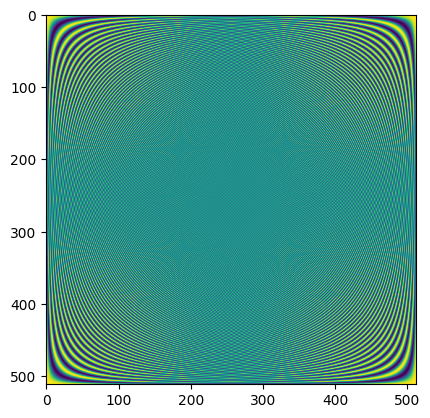

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n=256
w=np.exp(-2j*np.pi/n)
J,K=np.meshgrid(np.arange(n),np.arange(n))
DFT=np.power(w,J*K)
DFT = np.real(DFT)
plt.imshow(DFT)
plt.show()